In [141]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import os 
from datetime import datetime

In [142]:
from sklearn.impute import SimpleImputer

In [143]:
warnings.filterwarnings('ignore')

In [144]:
%matplotlib inline 

In [145]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'rocket' , font_scale = 1
             , rc = {'figure.figsize' : (8 , 4)})

In [146]:
df = pd.read_csv('Messi.csv')
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,5/1/05,H,FC Barcelona,Albacete Balompie,2:0,CF,90+1,2:0,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11/2/05,H,FC Barcelona,Panathinaikos Athens,5:0,RW,34,3:0,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:1,RW,51,2:0,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:1,RW,50,2:1,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho


In [147]:
df['Season'].value_counts()

11/12    73
12/13    60
14/15    58
16/17    54
10/11    53
18/19    51
09/10    47
17/18    45
13/14    41
15/16    41
08/09    38
20/21    38
19/20    31
06/07    17
07/08    16
21/22    11
05/06     8
04/05     1
Name: Season, dtype: int64

<AxesSubplot:xlabel='Season', ylabel='count'>

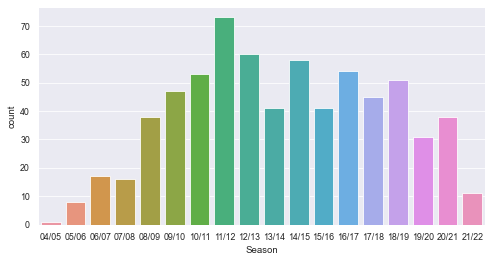

In [148]:
sns.countplot(df['Season'])

In [149]:
df['Venue']

0      H
1      H
2      H
3      H
4      H
      ..
678    A
679    H
680    H
681    A
682    A
Name: Venue, Length: 683, dtype: object

In [150]:
df['Result'].unique()

array(['2:0', '5:0', '4:1', '2:1', '0:3', '5:1', '2:3', '3:0', '1:1',
       '3:1', '3:3', '0:4', '5:2', '0:6', '2:2', '1:5', '1:4', '0:2',
       '6:0', '1:6', '1:2', '6:1', '0:5', '1:0', '2:5', '1:3', '4:3',
       '4:0', '0:1', '2:6', '4:2', '1:2 AET', '2:4', '0:8', '3:2', '8:0',
       '7:1', '5:3', '0:7', '4:5', '7:0', '3:4', '5:4 AET', '6:2', '8:2',
       '4:4'], dtype=object)

In [151]:
df['Date'] = pd.to_datetime(df['Date'] , errors = 'coerce')

In [152]:
df['Month'] = df['Date'].dt.month_name()

In [153]:
df['Year'] = df['Date'].dt.year

In [154]:
df.drop(['Date'] , axis = 1 , inplace = True)

In [155]:
df

,Season,Competition,Matchday,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,Month,Year
0,04/05,LaLiga,34,H,FC Barcelona,Albacete Balompie,2:0,CF,90+1,2:0,Left-footed shot,Ronaldinho Gaacho,May,2005
1,05/06,UEFA Champions League,Group Stage,H,FC Barcelona,Panathinaikos Athens,5:0,RW,34,3:0,Left-footed shot,NaN,November,2005
2,05/06,LaLiga,13,H,FC Barcelona,Racing Santander,4:1,RW,51,2:0,Left-footed shot,Samuel Etoo,November,2005
3,05/06,LaLiga,19,H,FC Barcelona,Athletic Bilbao,2:1,RW,50,2:1,Left-footed shot,Mark van Bommel,January,2006
4,05/06,LaLiga,20,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho,January,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,21/22,Ligue 1,23,A,Paris Saint-Germain,LOSC Lille,1:5,CF,38,1:3,Left-footed shot,NaN,February,2022
679,21/22,Ligue 1,30,H,Paris Saint-Germain,FC Lorient,5:1,RW,73,4:1,Left-footed shot,Kylian Mbappe,April,2022
680,21/22,Ligue 1,34,H,Paris Saint-Germain,RC Lens,1:1,RW,68,1:0,Left-footed shot,Neymar,April,2022
681,21/22,Ligue 1,37,A,Paris Saint-Germain,Montpellier,0:4,CF,6,0:1,Left-footed shot,Kylian Mbappé,May,2022


In [156]:
df.drop(['Result' , 'At_score'] , axis = 1 , inplace = True)

In [157]:
from sklearn.impute import SimpleImputer

In [158]:
sm = SimpleImputer(strategy = 'most_frequent')

In [159]:
df['Type'] = sm.fit_transform(df[['Type']])

In [160]:
df['Competition'].unique()

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1'], dtype=object)

In [161]:
df['Club'].unique()

array(['FC Barcelona', 'Paris Saint-Germain'], dtype=object)

In [162]:
mod = df[(df['Club'] == 'FC Barcelona')]['Goal_assist'].mode()[0]
idx = df[(df['Club'] == 'FC Barcelona') & (df['Goal_assist'].isnull())].index

In [163]:
df['Goal_assist'].loc[idx] = mod

In [164]:
mod = df[(df['Club'] == 'Paris Saint-Germain')]['Goal_assist'].mode()[0]
idx = df[(df['Club'] == 'Paris Saint-Germain') & (df['Goal_assist'].isnull())].index

In [167]:
df['Goal_assist'].loc[idx]

674    Kylian Mbappe
677    Kylian Mbappe
678    Kylian Mbappe
Name: Goal_assist, dtype: object

In [168]:
def mints(x):
    try:
        return int(x)
    except:
        return int(x.split('+')[0]) + int(x.split('+')[1]) 

In [169]:
df['Minute'] = df['Minute'].apply(mints)

In [170]:
df['Minute']

0      91
1      34
2      51
3      50
4      82
       ..
678    38
679    73
680    68
681     6
682    20
Name: Minute, Length: 683, dtype: int64

In [171]:
df['Season'].unique()

array(['04/05', '05/06', '06/07', '07/08', '08/09', '09/10', '10/11',
       '11/12', '12/13', '13/14', '14/15', '15/16', '16/17', '17/18',
       '18/19', '19/20', '20/21', '21/22'], dtype=object)

In [172]:
df.columns

Index(['Season', 'Competition', 'Matchday', 'Venue', 'Club', 'Opponent',
       'Playing_Position', 'Minute', 'Type', 'Goal_assist', 'Month', 'Year'],
      dtype='object')

In [173]:
df['Competition'].unique()

array(['LaLiga', 'UEFA Champions League', 'Copa del Rey', 'Supercopa',
       'FIFA Club World Cup', 'UEFA Super Cup', 'Ligue 1'], dtype=object)

In [174]:
df['Matchday'].unique()

array(['34', 'Group Stage', '13', '19', '20', '21', 'Quarter-Finals',
       '24', '1', '2', '6', '26', '27', '28', 'Semi-Finals', '35', '37',
       '38', '4', '5', '7', '9', 'last 16', '25', '3', 'Fifth Round',
       '11', '15', 'Round of 16', '18', '31', '33', 'Final', 'final', '8',
       '10', '5th round', '17', '30', '36', '4th round', '12', '14', '22',
       '32', '29', '16', '23'], dtype=object)

In [175]:
df['Venue'].unique()

array(['H', 'A'], dtype=object)

In [176]:
df['Venue'] = df['Venue'].map({'H' : 'Home' , 'A' : 'Away'})

In [177]:
df['Club'].unique()

array(['FC Barcelona', 'Paris Saint-Germain'], dtype=object)

In [178]:
df['Opponent'].unique()

array(['Albacete Balompie', 'Panathinaikos Athens', 'Racing Santander',
       'Athletic Bilbao', 'Deportivo Alaves', 'RCD Mallorca',
       'Real Zaragoza', 'Real Betis Balompie', 'Celta de Vigo',
       'CA Osasuna', 'SV Werder Bremen', 'Sevilla FC', 'Real Madrid',
       'Recreativo Huelva', 'Deportivo de La Coruaa', 'Getafe CF',
       'Atletico de Madrid', 'RCD Espanyol Barcelona',
       'Gimnastic de Tarragona', 'Olympique Lyon', 'Levante UD',
       'VfB Stuttgart', 'UD Almera', 'Rangers FC', 'Celtic FC',
       'Valencia CF', 'Sporting GijÃ³n', 'Shakhtar Donetsk',
       'FC Basel 1893', 'Malaga CF', 'Benidorm CD', 'Sporting CP',
       'CD Numancia', 'Bayern Munich', 'Manchester United', 'Dynamo Kyiv',
       'Cultural Leonesa', 'CF Atlante', 'Club Estudiantes de La Plata',
       'CD Tenerife', 'Real Valladolid CF', 'Arsenal FC', 'Villarreal CF',
       'FC Copenhagen', 'Club Atletico de Ceuta', 'Real Sociedad',
       'Hercules CF', 'FC Porto', 'BATE Borisov', 'FC Viktoria 

In [179]:
df['Opponent'] = df['Opponent'].apply(lambda x : 'Sporting de Gijón' if x == 'Sporting GijÃ³n' else x)

In [180]:
df['Opponent'] = df['Opponent'].apply(lambda x : 'Córdoba CF' if x == 'CÃ³rdoba CF' else x)

In [181]:
df['Opponent'] = df['Opponent'].apply(lambda x : 'Borussia Mönchengladbach' if x == 'Borussia MÃ¶nchengladbach' else x)

In [182]:
df.columns

Index(['Season', 'Competition', 'Matchday', 'Venue', 'Club', 'Opponent',
       'Playing_Position', 'Minute', 'Type', 'Goal_assist', 'Month', 'Year'],
      dtype='object')

In [183]:
df['Playing_Position'].unique()

array(['CF', 'RW', 'LW', 'SS', 'CF ', 'AM', 'RW ', 'AM ', 'SS '],
      dtype=object)

In [184]:
df['Playing_Position'] = df['Playing_Position'].apply(lambda x : x.strip())

In [185]:
df['Type'].unique()

array(['Left-footed shot', 'Right-footed shot', 'Header', 'Solo run',
       'Penalty', 'Deflected shot on goal', 'Direct free kick',
       'Penalty rebound', 'Counter attack goal', 'Chest', 'Tap-in',
       'Long distance kick'], dtype=object)

In [186]:
df['Goal_assist'].unique()

array(['Ronaldinho Gaacho', 'Luis Suarez', 'Samuel Etoo',
       'Mark van Bommel', 'Sylvinho', 'Ludovic Giuly', 'Andres Iniesta',
       'Deco', 'Xavi', 'Giovanni van Bronckhorst', 'Gianluca Zambrotta',
       'Thierry Henry', 'Bojan Krkic', 'Dani Alves', 'Aleksandr Hleb',
       'Gerard Pique', 'Zlatan Ibrahimovic', 'Pedro', 'Ã‰ric Abidal',
       'Yaya Toure', 'Seydou Keita', 'Maxwell', 'David Villa', 'Thiago',
       'Adriano', 'Ibrahim Afellay', 'Sergio Busquets', 'Cesc Fabregas',
       'Alexis Sanchez', 'Cristian Tello', 'Isaac Cuenca', 'Jordi Alba',
       'Marta Montoya', 'Neymar', 'Alex Song', 'Antonio Amaya',
       'Marc Bartra', 'Rafinha', 'Ivan Rakitic', 'Arda Turan',
       'Munir El Haddadi', 'Lucas Digne', 'Sergi Roberto',
       'Javier Mascherano', 'Paco Alcacer', 'Paulinho', 'Aleix Vidal',
       'Denis Suarez', 'Ousmane Dembele', 'Philippe Coutinho',
       'Arturo Vidal', 'Nelson Semedo', 'Malcom', 'Clement Lenglet',
       'Antoine Griezmann', 'Arthur', 'Frenkie 

In [187]:
df['Goal_assist'] = df['Goal_assist'].apply(lambda x : 'Eric Abidal' if x == 'Ã‰ric Abidal' else x )

In [188]:
df['Goal_assist'] = df['Goal_assist'].apply(lambda x : 'Francisco Trincão' if x == 'Francisco TrincÃ£o' else x )

In [189]:
df['Goal_assist'] = df['Goal_assist'].apply(lambda x : 'Kylian Mbappé' if x == 'Kylian Mbappe' else x )

In [190]:
df.columns

Index(['Season', 'Competition', 'Matchday', 'Venue', 'Club', 'Opponent',
       'Playing_Position', 'Minute', 'Type', 'Goal_assist', 'Month', 'Year'],
      dtype='object')

In [191]:
df.duplicated().sum()

0

In [192]:
df.isnull().mean()

Season              0.0
Competition         0.0
Matchday            0.0
Venue               0.0
Club                0.0
Opponent            0.0
Playing_Position    0.0
Minute              0.0
Type                0.0
Goal_assist         0.0
Month               0.0
Year                0.0
dtype: float64

In [193]:
df['Minute']

0      91
1      34
2      51
3      50
4      82
       ..
678    38
679    73
680    68
681     6
682    20
Name: Minute, Length: 683, dtype: int64

In [194]:
def part(x):
    if  0 <= x <= 22:
        return '1st'
    elif 23 <= x <= 45:
        return '2nd'
    elif 46 <= x <= 67:
        return '3rd'
    else :
        return '4th'

In [195]:
df['Match Half'] = df['Minute'].apply(lambda x : '1st' if x <= 45 else '2nd')

In [196]:
df.to_csv('Leo Messi.csv' , index = False)